In [ ]:
# Install needed libraries

!pip install -U scikit-tda umap-learn yfinance

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.3/841.3 kB 27.1 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18104 sha256=d4b39f629941274c9f546a2ce0d0cb62a8063c6fe2e135c0f956c9b4d2091fdd
  Stored in directory: /root/.cache/pip/wheels/1f/cc/2d/de23a8b9ae586817b0b44de4a4b1a08f23473e248a644b312f
Successfully built hopcroftkarp


In [ ]:
# Import the needed libraries
import kmapper as km
from kmapper.jupyter import display
from umap import umap_ as umap
import yfinance as yf
import sklearn
import sklearn.manifold as manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Get current S&P 500 ticker names
# Some have been renamed, merged, etc...
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
table = pd.read_html(sp500_url, header=0)
sp500_df = table[0]

# Extract the ticker symbols
ticker_names = sp500_df['Symbol'].tolist()

# Handle special characters like BRK.B (replace '.' with '-')
ticker_names = [ticker.replace('.', '-') for ticker in ticker_names]

In [ ]:
# Choice of date range
# Here you can play with the dates to cover some major financial crashes, etc.
# However keep in mind that some tickers have changed names, joined the SP500
# at different dates, etc. At that point it might be easier to filter them out

start_date_string = "2024-01-01"
end_date_string = "2025-01-01"

# Request the data from Yahoo Finance
raw_data = yf.download(ticker_names, start=start_date_string, end=end_date_string)

YF.download() has changed argument auto_adjust default to True


[*****                 11%                       ]  54 of 503 completedERROR:yfinance:Could not get exchangeTimezoneName for ticker 'LEN' reason: 'chart'
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LEN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-01-01 -> 2025-01-01)')


In [ ]:
raw_data

Price      Adj Close       Close                                      \
Ticker           LEN           A        AAPL        ABBV        ABNB   
Date                                                                   
2024-01-02       NaN  137.501770  184.532089  152.743378  134.479996   
2024-01-03       NaN  129.980057  183.150391  153.355072  133.419998   
2024-01-04       NaN  129.821457  180.824371  154.310791  133.720001   
2024-01-05       NaN  129.385437  180.098694  154.960678  135.979996   
2024-01-08       NaN  132.180084  184.452545  154.282104  140.080002   
...              ...         ...         ...         ...         ...   
2024-12-24       NaN  135.560913  257.916443  178.318420  134.990005   
2024-12-26       NaN  135.291977  258.735504  177.525894  135.320007   
2024-12-27       NaN  135.003113  255.309296  176.347015  133.384995   
2024-12-30       NaN  133.887558  251.923019  174.553925  131.809998   
2024-12-31       NaN  134.055191  250.144974  176.039917  131.410004   

Price                                                                  ...  \
Ticker             ABT       ACGL         ACN        ADBE         ADI  ...   
Date                                                                   ...   
2024-01-02  107.138481  71.840385  341.431366  580.070007  189.526352  ...   
2024-01-03  106.816635  73.162132  332.573761  571.789978  185.003098  ...   
2024-01-04  108.240593  73.666107  331.756897  567.049988  182.173615  ...   
2024-01-05  108.065033  73.038513  331.294312  564.599976  182.643570  ...   
2024-01-08  109.625549  73.333298  334.965302  580.549988  185.022659  ...   
...                ...        ...         ...         ...         ...  ...   
2024-12-24  114.160919  92.669998  361.630005  447.940002  217.145233  ...   
2024-12-26  114.668251  92.930000  360.429993  450.160004  217.115356  ...   
2024-12-27  114.389717  92.339996  356.179993  446.480011  216.050003  ...   
2024-12-30  112.211151  91.889999  352.489990  445.799988  211.639191  ...   
2024-12-31  112.519531  92.349998  351.790009  444.679993  211.539627  ...   

Price       Volume                                                         \
Ticker         WTW       WY     WYNN      XEL       XOM      XYL      YUM   
Date                                                                        
2024-01-02  394600  2317100  3013600  4627600  23483000  1089400  1485300   
2024-01-03  446200  2939800  2369100  4538600  23490800  1182800  1483600   
2024-01-04  273400  3317500  1694100  3129300  19395200  1352600  3019000   
2024-01-05  414700  4199900  2534700  3531000  15825000  1144300  1408800   
2024-01-08  308300  2262500  1441700  3738900  23370100   904300  1204100   
...            ...      ...      ...      ...       ...      ...      ...   
2024-12-24  191200  1780100   692800   943900   7807000   379300   533000   
2024-12-26  258700  1736500  1218900  1394900   9652400   575700  1040900   
2024-12-27  310700  2320500  1086700  2015000  11943900   552400  1146300   
2024-12-30  320300  2914700  2180100  2642900  11080800   586800  1144600   
2024-12-31  362700  3125200  1612600  2143800  12387800   641600  1217100   

Price                                 
Ticker          ZBH    ZBRA      ZTS  
Date                                  
2024-01-02  1087400  452900  1642300  
2024-01-03  2325500  404800  1493000  
2024-01-04  2099400  358100  1851900  
2024-01-05  1391000  293500  1088200  
2024-01-08  1427600  399500  1610600  
...             ...     ...      ...  
2024-12-24   458600   88700  1023600  
2024-12-26  1277300  140100  2167200  
2024-12-27   743400  287200  1800100  
2024-12-30  1532000  211300  1531400  
2024-12-31   683300  327900  1327400  

[252 rows x 2516 columns]

In [ ]:
# We will focus on closing prices of the tickers
# although you may be interested in other data
df_close = raw_data['Close'].dropna(axis='columns')

In [ ]:
df_close

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,137.501770,184.532089,152.743378,134.479996,107.138481,71.840385,341.431366,580.070007,189.526352,69.449020,...,236.352280,33.541058,93.315514,60.614449,98.106003,112.081635,125.917297,120.097160,267.980011,194.055603
2024-01-03,129.980057,183.150391,153.355072,133.419998,106.816635,73.162132,332.573761,571.789978,185.003098,69.802177,...,237.022079,32.837269,92.753258,60.719501,98.930267,110.001114,125.985611,119.186966,252.520004,190.462143
2024-01-04,129.821457,180.824371,154.310791,133.720001,108.240593,73.666107,331.756897,567.049988,182.173615,68.484978,...,235.899170,32.384136,92.930809,60.862747,98.067657,110.760361,125.585510,118.919830,252.970001,191.557938
2024-01-05,129.385437,180.098694,154.960678,135.979996,108.065033,73.038513,331.294312,564.599976,182.643570,67.587746,...,235.288452,32.470905,94.351257,60.862747,98.364784,110.582886,125.243942,118.702171,252.690002,192.357590
2024-01-08,132.180084,184.452545,154.282104,140.080002,109.625549,73.333298,334.965302,580.549988,185.022659,67.826370,...,238.538986,32.827629,95.732239,60.719501,96.725845,111.273102,125.536713,120.670982,261.089996,193.640961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,135.560913,257.916443,178.318420,134.990005,114.160919,92.669998,361.630005,447.940002,217.145233,50.069885,...,314.282227,28.063620,88.535454,67.087982,105.456718,117.784721,134.365067,106.830162,395.440002,164.203583
2024-12-26,135.291977,258.735504,177.525894,135.320007,114.668251,92.930000,360.429993,450.160004,217.115356,50.050106,...,316.112061,27.974245,89.063995,67.058479,105.545921,118.103729,135.360367,106.780373,396.850006,165.021118
2024-12-27,135.003113,255.309296,176.347015,133.384995,114.389717,92.339996,356.179993,446.480011,216.050003,50.020439,...,314.560699,27.795496,88.435730,67.019135,105.536011,117.166634,134.593979,106.402039,389.070007,164.103897


In [ ]:
# Convert to numpy array
data_array = df_close.to_numpy()  # shape: (days, tickers)

# Standardize (z-score)
# standardized shape: (500, 252)
standardized = (data_array - np.mean(data_array, axis=0)) / np.std(data_array, axis=0)

# Taking the transpose will allow use to cluster the tickers
# Otherwise we would be clustering by the date, which also may be of interest
#standardized = standardized.T  # shape: (tickers, days)

# Percent return over the full period
per_return = (data_array[-1] - data_array[0]) / data_array[0]  # shape: (tickers,)

In [ ]:
# initialize mapper
mapper = km.KeplerMapper(verbose=1)

# project data into 2D subspace via 2 step transformation, 1)isomap 2)UMAP
projected_data = mapper.fit_transform(
    standardized,
    projection=[
        manifold.Isomap(n_components=150, n_jobs=-1),
        umap.UMAP(n_components=2, random_state=1)
    ]
)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 2:
	Projections: Isomap(n_components=150, n_jobs=-1)
		UMAP(random_state=1)
	Distance matrices: False
False
	Scalers: MinMaxScaler()
MinMaxScaler()
..Projecting on data shaped (252, 499)

..Projecting data using: 
	Isomap(n_components=150, n_jobs=-1)



/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



..Scaling with: MinMaxScaler()

..Projecting on data shaped (252, 150)

..Projecting data using: 
	UMAP(random_state=1, verbose=1)

UMAP(n_jobs=1, random_state=1, verbose=1)
Sun Apr  6 14:25:36 2025 Construct fuzzy simplicial set
Sun Apr  6 14:25:37 2025 Finding Nearest Neighbors
Sun Apr  6 14:25:42 2025 Finished Nearest Neighbor Search
Sun Apr  6 14:25:45 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sun Apr  6 14:25:46 2025 Finished embedding

..Scaling with: MinMaxScaler()



In [ ]:
# Create our mapper graph
G = mapper.map(
    projected_data,
    standardized,  # now the shape matches: (500, N)
    clusterer=sklearn.cluster.DBSCAN(metric="cosine")
)

Mapping on data shaped (252, 499) using lens shaped (252, 2)

Creating 100 hypercubes.

Created 27 edges and 34 nodes in 0:00:00.091208.


In [ ]:
# Useful for naming the resulting files

fileID = 'projection=' + G['meta_data']['projection'].split('(')[0] + '_' + 'n_cubes=' + str(G['meta_data']['n_cubes']) + '_' + 'perc_overlap=' + str(G['meta_data']['perc_overlap']) + '_' + 'clusterer=' + G['meta_data']['clusterer'].split('(')[0] + '_' + 'scaler=' + G['meta_data']['scaler'].split('(')[0]

In [ ]:
# Mapper where the coloring function is the Log-return
mapper.visualize(G,
                path_html="mapper_example_" + fileID + ".html",
                title=fileID,
                custom_tooltips = df_close.columns.to_numpy(),
                color_values = np.log(per_return+1),
                color_function_name = 'Log Percent Returns',
                node_color_function = np.array(['average', 'std', 'sum', 'max', 'min']))

Wrote visualization to: mapper_example_projection=UMAP_n_cubes=10_perc_overlap=0.1_clusterer=DBSCAN_scaler=MinMaxScaler.html


/usr/local/lib/python3.11/dist-packages/kmapper/visuals.py:344: RuntimeWarning: invalid value encountered in scalar divide
  height = np.floor(((bar / max_bucket_value) * 100) + 0.5)
/usr/local/lib/python3.11/dist-packages/kmapper/visuals.py:345: RuntimeWarning: invalid value encountered in scalar divide
  perc = round((bar / sum_bucket_value) * 100.0, 1)


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>projection=UMAP_n_cubes=10_perc_overlap=0.1_clusterer=DBSCAN_scaler=MinMaxScaler | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text

In [ ]:
# Mapper where the coloring function is the volatility of the stock

volatility = np.std(data_array, axis=1)

mapper.visualize(
    G,
    path_html="mapper_volatility_" + fileID + ".html",
    title="Volatility View: " + fileID,
    custom_tooltips=df_close.columns.to_numpy(),
    color_values=volatility,
    color_function_name='Volatility',
    node_color_function = np.array(['average', 'std', 'sum', 'max', 'min'])
)

Wrote visualization to: mapper_volatility_projection=UMAP_n_cubes=10_perc_overlap=0.1_clusterer=DBSCAN_scaler=MinMaxScaler.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Volatility View: projection=UMAP_n_cubes=10_perc_overlap=0.1_clusterer=DBSCAN_scaler=MinMaxScaler | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-wei

In [ ]:
G

{'nodes': defaultdict(list,
             {'cube1_cluster0': [227, 234, 235, 236, 237, 238, 239, 240, 242],
              'cube2_cluster0': [232,
               234,
               241,
               242,
               243,
               244,
               245,
               246,
               247,
               248,
               249,
               250,
               251],
              'cube5_cluster0': [210, 211, 212, 213, 216, 218, 219],
              'cube6_cluster0': [205,
               214,
               215,
               216,
               217,
               218,
               219,
               220,
               221,
               222],
              'cube7_cluster0': [224, 226, 229, 230, 231],
              'cube10_cluster0': [157, 160, 161, 162, 163, 164, 166, 167],
              'cube11_cluster0': [165, 168, 169, 171, 172, 173, 174, 175, 176],
              'cube12_cluster0': [170, 176, 183, 199, 204, 207],
              'cube13_cluster0': [190, 191, 198

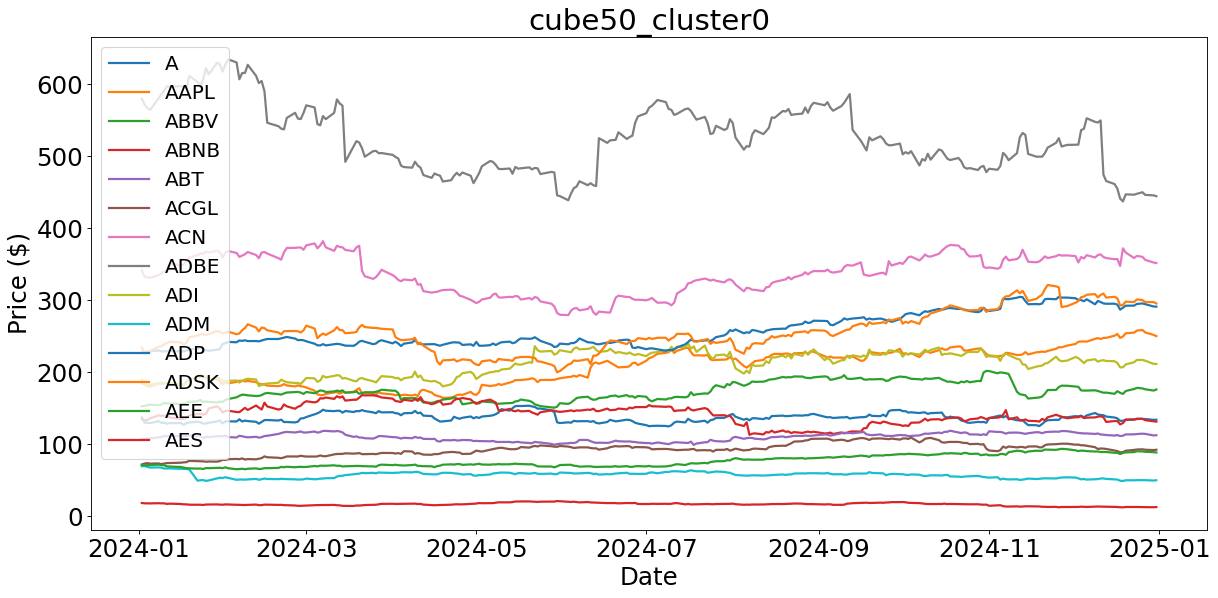

In [ ]:
# Plot one of the clusters with lowest volatility
nodeid = 'cube50_cluster0'
node = G['nodes'][nodeid]

plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 22})

for i in node:
    plt.plot(df_close.iloc[:,i], linewidth=2)

plt.legend(list(df_close.columns[node]), fontsize=18)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(nodeid)

plt.savefig("mapper_volatility_low_" + fileID + ".pdf", dpi='figure', format=None, metadata=None,
       bbox_inches=None, pad_inches=0.1,
       facecolor='white', edgecolor='auto')

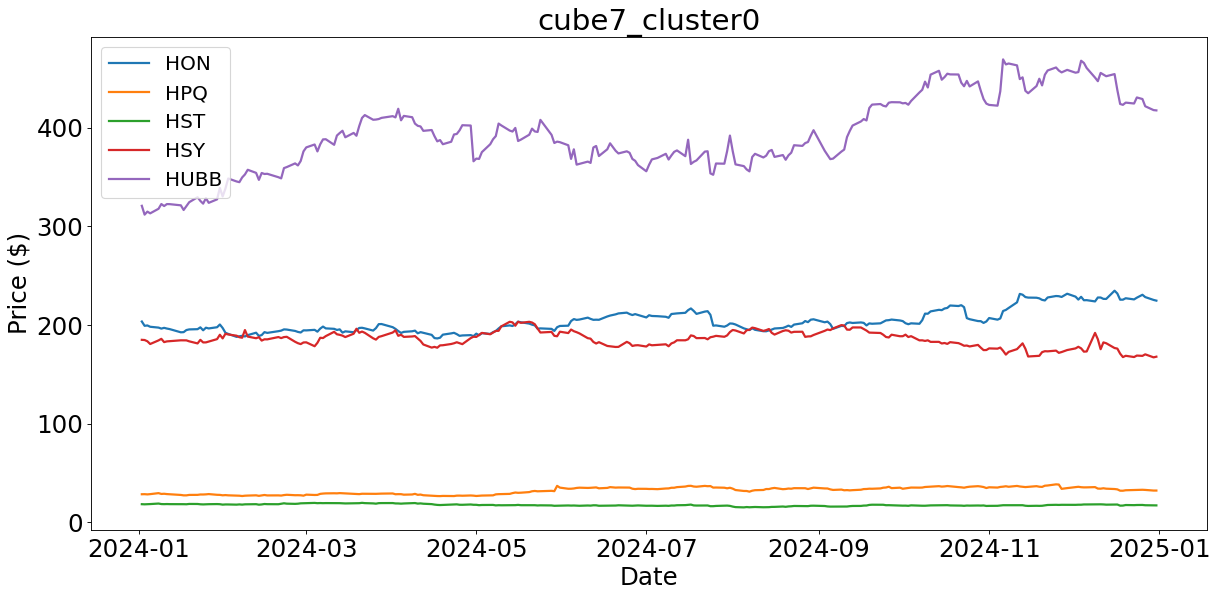

In [ ]:
# Plot one of the clusters with highest volatility

nodeid = 'cube7_cluster0'
node = G['nodes'][nodeid]

plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 22})

for i in node:
    plt.plot(df_close.iloc[:,i], linewidth=2)

plt.legend(list(df_close.columns[node]), fontsize=18)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(nodeid)

plt.savefig("mapper_volatility_high_" + fileID + ".pdf", dpi='figure', format=None, metadata=None,
       bbox_inches=None, pad_inches=0.1,
       facecolor='white', edgecolor='auto')

In [ ]:
df_close.columns[226]

'HPQ'

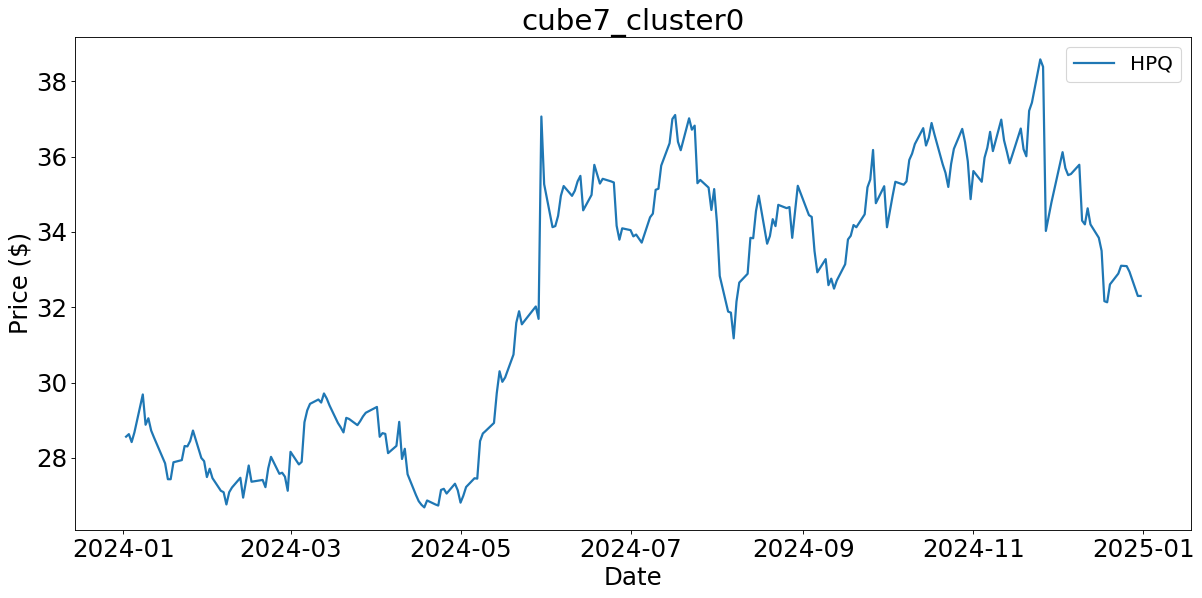

In [ ]:
# Plot one of the curves for better representation

nodeid = 'cube7_cluster0'
node = 226

plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 22})

plt.plot(df_close.iloc[:,node], linewidth=2)

plt.legend(['HPQ'], fontsize=18)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title(nodeid)

plt.savefig("mapper_volatility_HPQ_" + fileID + ".pdf", dpi='figure', format=None, metadata=None,
       bbox_inches=None, pad_inches=0.1,
       facecolor='white', edgecolor='auto')